# a) Logistic Regression

In [1]:
import numpy as np                               
import pandas as pd                              
import matplotlib.pyplot as plt                 
import seaborn as sns                           
import warnings                                  
warnings.filterwarnings('ignore')  

In [2]:
df = pd.read_csv('Data1.csv')
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108045,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [3]:
df.shape

(2227, 3)

In [4]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


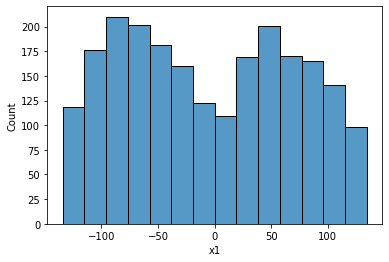

In [6]:
sns.histplot(df['x1']);   

In [ ]:
sns.histplot(df['x2']);   

In [36]:
df.y.value_counts()

0    1242
1     985
Name: y, dtype: int64

In [7]:
df.isnull().any()

x1     True
x2     True
y     False
dtype: bool

In [10]:
df= df.dropna(axis = 0)
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108045,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [11]:
df.isnull().any()

x1    False
x2    False
y     False
dtype: bool

In [12]:
df.columns

Index(['x1', 'x2', 'y'], dtype='object')

In [14]:
feature_names = ['x1', 'x2']  
training_features = df[feature_names]                                         
training_features

,x1,x2
0,-119.366669,1.150000e+02
1,-101.108045,9.777716e+01
2,-130.278658,1.067677e+02
3,-114.703415,1.011955e+02
4,-119.366669,1.150000e+02
...,...,...
2222,98.714112,8.964312e+01
2223,96.633331,9.100000e+01
2224,85.673940,1.038393e+02
2225,78.958862,7.860537e+01


In [16]:
training_features.mean()

x1       -4.771837
x2    89677.816733
dtype: float64

In [18]:
training_features.std()

x1    7.493826e+01
x2    2.986680e+06
dtype: float64

In [19]:
training_features.describe()

,x1,x2
count,2219.000000,2.219000e+03
mean,-4.771837,8.967782e+04
std,74.938264,2.986680e+06
min,-134.369160,-1.348761e+02
25%,-71.581453,-8.025966e+01
50%,-9.750840,-1.566092e+00
75%,59.963056,6.390448e+01
max,134.508687,1.000000e+08


In [15]:
outcome_name = ['y']                                                  
outcome_labels = df[outcome_name]   
outcome_labels 

,y
0,1
1,1
2,1
3,1
4,1
...,...
2222,0
2223,0
2224,0
2225,0


In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(training_features) # padh

training_features= ss.transform(training_features)
training_features

array([[-1.52953452e+00, -2.99941733e-02],
       [-1.28583072e+00, -2.99999411e-02],
       [-1.67518040e+00, -2.99969302e-02],
       ...,
       [ 1.20720924e+00, -2.99979109e-02],
       [ 1.11758091e+00, -3.00063617e-02],
       [ 1.52687860e+00,  3.34595047e+01]])

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

model = lr.fit(training_features, np.array(outcome_labels['y']))

model

LogisticRegression()

In [22]:
pred_labels = model.predict(training_features)
pred_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [24]:
actual_labels = np.array(outcome_labels['y'])

In [23]:
from sklearn.metrics import accuracy_score, classification_report

In [25]:
accuracy_score(actual_labels, pred_labels)

0.5808922938260478

In [26]:
print(classification_report(actual_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.59      0.82      0.69      1238
           1       0.55      0.28      0.37       981

    accuracy                           0.58      2219
   macro avg       0.57      0.55      0.53      2219
weighted avg       0.57      0.58      0.55      2219



# Note: 
Logistic Regression is not good for given dataset because accuracy score is just 58%

# -------------------------------------------------------------------------------------------------------------

# b) SVM with Linear Kernel

In [50]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings                                  
warnings.filterwarnings('ignore') 

In [51]:
df = pd.read_csv('Data1.csv')
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108045,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [52]:
df.shape

(2227, 3)

In [53]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2219 non-null   float64
 1   x2      2219 non-null   float64
 2   y       2219 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.3 KB


In [54]:
df.isnull().any()

x1     True
x2     True
y     False
dtype: bool

In [56]:
df= df.dropna(axis = 0)
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108045,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [57]:
df.y.value_counts()

0    1238
1     981
Name: y, dtype: int64

In [58]:
X =df.drop('y', axis=1)  
X

,x1,x2
0,-119.366669,1.150000e+02
1,-101.108045,9.777716e+01
2,-130.278658,1.067677e+02
3,-114.703415,1.011955e+02
4,-119.366669,1.150000e+02
...,...,...
2222,98.714112,8.964312e+01
2223,96.633331,9.100000e+01
2224,85.673940,1.038393e+02
2225,78.958862,7.860537e+01


In [59]:
df.isnull().any()

x1    False
x2    False
y     False
dtype: bool

In [26]:
y =df['y'] 
y

0       1
1       1
2       1
3       1
4       1
       ..
2222    0
2223    0
2224    0
2225    0
2226    0
Name: y, Length: 2219, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [28]:
from sklearn.svm import SVC

In [29]:
svclassifier = SVC(kernel= 'linear')

In [30]:
svclassifier.fit(X_train,y_train)

SVC(kernel='linear')

In [31]:
y_pred = svclassifier.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[247   1]
 [196   0]]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71       248
           1       0.00      0.00      0.00       196

    accuracy                           0.56       444
   macro avg       0.28      0.50      0.36       444
weighted avg       0.31      0.56      0.40       444



# Note:
SVM with Linear Kernel is not good for given dataset because we had obtain f1 score as 56%

# --------------------------------------------------------------------------------------------------------------

# c) SVM with RBF Kernel

In [33]:
from sklearn.svm import SVC  

In [34]:
svclassifier = SVC(kernel='rbf', gamma='auto')  

In [35]:
svclassifier.fit(X_train, y_train) 

SVC(gamma='auto')

In [36]:
y_pred = svclassifier.predict(X_test)  

In [37]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[237  11]
 [121  75]]
              precision    recall  f1-score   support

           0       0.66      0.96      0.78       248
           1       0.87      0.38      0.53       196

    accuracy                           0.70       444
   macro avg       0.77      0.67      0.66       444
weighted avg       0.75      0.70      0.67       444



# Note:
SVM with RBF Kernel is not good for given dataset because we had obtain accuracy score as 70%. here accuracy as increase as compare to linear kernel 

# ---------------------------------------------------------------------------------------------------------------

# d) Decision Tree

In [38]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings                                  
warnings.filterwarnings('ignore') 

In [39]:
df = pd.read_csv('Data1.csv')
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108045,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [40]:
df.shape

(2227, 3)

In [41]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2219 non-null   float64
 1   x2      2219 non-null   float64
 2   y       2219 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.3 KB


In [42]:
df.isnull().any()

x1     True
x2     True
y     False
dtype: bool

In [43]:
df= df.dropna(axis = 0)
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108045,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [63]:
df.isnull().any()

x1    False
x2    False
y     False
dtype: bool

In [61]:
X =df.drop('y', axis=1)  
X

,x1,x2
0,-119.366669,1.150000e+02
1,-101.108045,9.777716e+01
2,-130.278658,1.067677e+02
3,-114.703415,1.011955e+02
4,-119.366669,1.150000e+02
...,...,...
2222,98.714112,8.964312e+01
2223,96.633331,9.100000e+01
2224,85.673940,1.038393e+02
2225,78.958862,7.860537e+01


In [62]:
y =df['y'] 
y

0       1
1       1
2       1
3       1
4       1
       ..
2222    0
2223    0
2224    0
2225    0
2226    0
Name: y, Length: 2219, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [65]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [68]:
accuracy_score(y_train, y_pred_train)

1.0

In [69]:
accuracy_score(y_test, y_pred_test)

0.9436936936936937

In [70]:
accuracy_score(y_test, y_pred_test)

0.9436936936936937

In [71]:
confusion_matrix(y_train, y_pred_train)

array([[998,   0],
       [  0, 777]], dtype=int64)

In [72]:
confusion_matrix(y_test, y_pred_test)

array([[227,  13],
       [ 12, 192]], dtype=int64)

# Note: 
Decision tree fits given dataset very well & we had obtain max accuracy score as compare to other models

# --------------------------------------------------------------------------------------------------------------

# e) KNN: K-Nearest Neighbor

# Step - 1

In [73]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings                                  
warnings.filterwarnings('ignore') 

In [74]:
df = pd.read_csv('Data1.csv')
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108045,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [75]:
df.shape

(2227, 3)

In [76]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [78]:
df.isnull().any()

x1     True
x2     True
y     False
dtype: bool

In [79]:
df= df.dropna(axis = 0)
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108045,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [80]:
X =df.drop('y', axis=1)  
X

,x1,x2
0,-119.366669,1.150000e+02
1,-101.108045,9.777716e+01
2,-130.278658,1.067677e+02
3,-114.703415,1.011955e+02
4,-119.366669,1.150000e+02
...,...,...
2222,98.714112,8.964312e+01
2223,96.633331,9.100000e+01
2224,85.673940,1.038393e+02
2225,78.958862,7.860537e+01


In [81]:
y =df['y'] 
y

0       1
1       1
2       1
3       1
4       1
       ..
2222    0
2223    0
2224    0
2225    0
2226    0
Name: y, Length: 2219, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [84]:
from sklearn.preprocessing import MinMaxScaler  
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [85]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [86]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[166  83]
 [112  83]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63       249
           1       0.50      0.43      0.46       195

    accuracy                           0.56       444
   macro avg       0.55      0.55      0.54       444
weighted avg       0.55      0.56      0.56       444



Comparing Error Rate with the K Value

Text(0, 0.5, 'Mean Error')

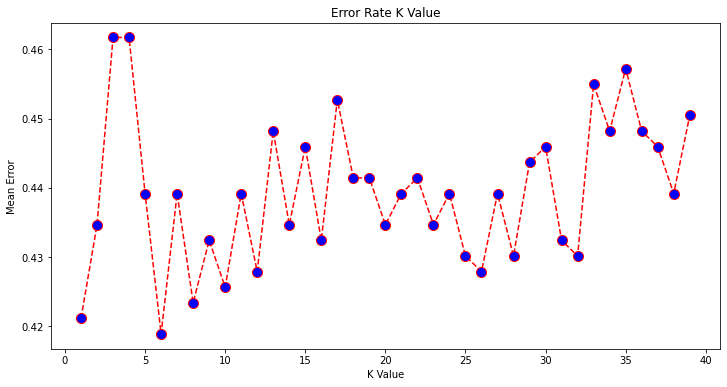

In [87]:
error = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')     

# Note:
KNN is not good for given dataset but better then Logistic regression as we had obtain accuracy as 56%

# ---------------------------------------------------------------------------------------------------------------

# Conclusion:

### Decision tree fits given dataset very well & we had obtain max accuracy score as compare to other models

# ---------------------------------------------- Thank You-------------------------------------------------